In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn; seaborn.set()
from sklearn.metrics import mean_squared_error
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Any results you write to the current directory are saved as output.
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

In [4]:
close = pd.read_csv("../Data/close.csv", index_col="TradingDate", parse_dates=True)
high = pd.read_csv("../Data/high.csv", index_col="TradingDate", parse_dates=True)
low = pd.read_csv("../Data/low.csv", index_col="TradingDate", parse_dates=True)
open = pd.read_csv("../Data/open.csv", index_col="TradingDate", parse_dates=True)
volume = pd.read_csv("../Data/volume.csv", index_col="TradingDate", parse_dates=True)
returns = close.pct_change()

In [11]:
def test_for_stationary(input_data):   
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print(dfoutput)
    print(dftest[1])
    if dftest[1] <= 0.05:
        print("Data is stationary")      
    else:
        print("Data is non - stationary")
    print(dftest[0] < list(dftest[4].items())[0][1])

In [18]:
ts = close["SSI"]

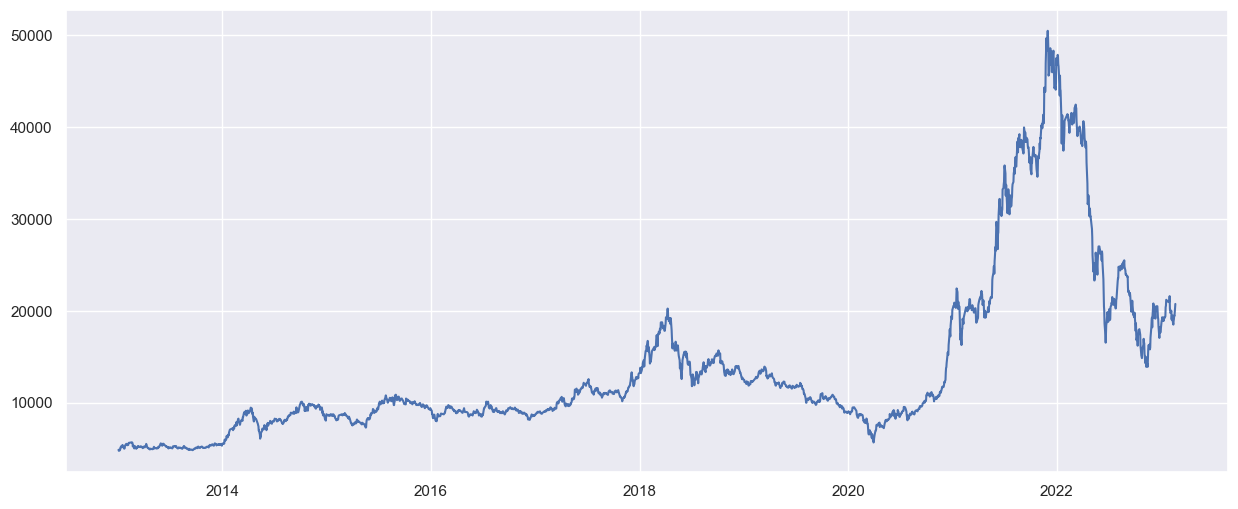

In [21]:
plt.plot(ts)

In [19]:
ts_diff = (ts - ts.shift(1))
# ts_log_diff = np.sign(ts_diff)*np.log(np.abs(ts_diff))
ts_diff.dropna(inplace=True)
print(len(ts_diff))
test_for_stationary(ts_diff)

2526
Results of Dickey-Fuller Test:
4.17356237070767e-15
Data is stationary
True


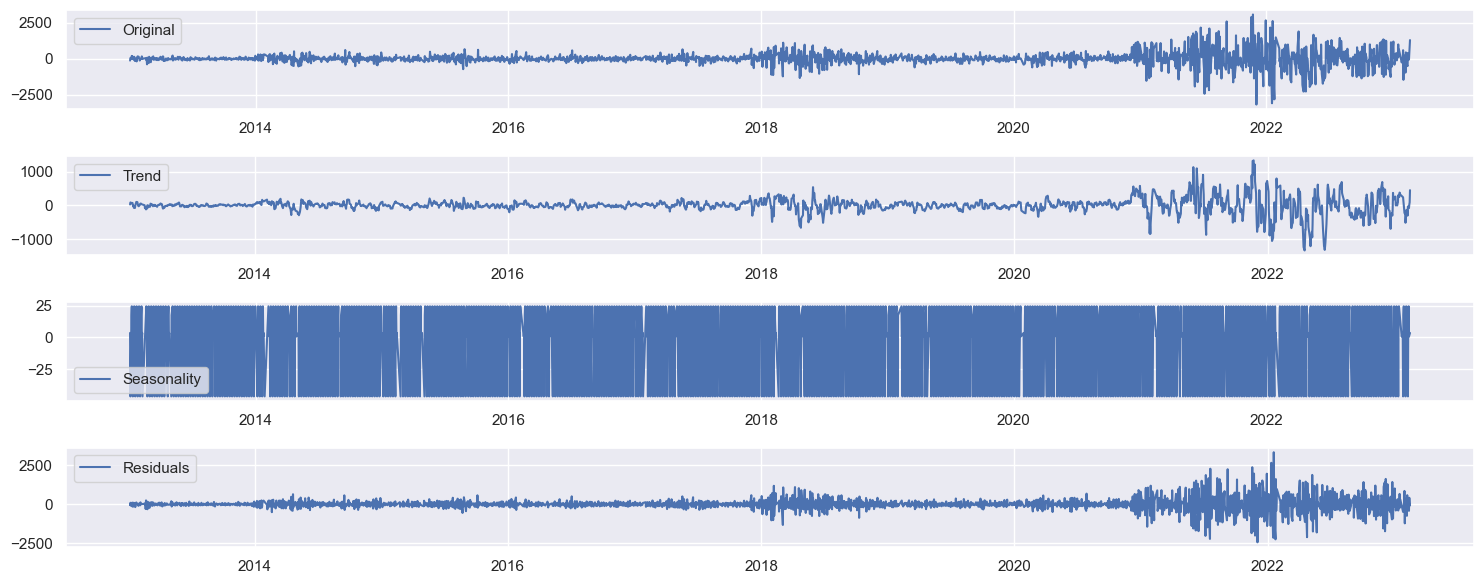

In [20]:
decomposition = seasonal_decompose(ts_diff, period=5)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_diff, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()